In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
df = pd.read_csv('winequality-red.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [5]:
df['quality'].value_counts().sort_index()

3     10
4     53
5    681
6    638
7    199
8     18
Name: quality, dtype: int64

     There are only 6 quality of wines . So lets map them into int values from 0-5

In [6]:
quality_mapping = {
    3 : 0,
    4 : 1,
    5 : 2,
    6 : 3,
    7 : 4,
    8 : 5
}
quality_mapping

{3: 0, 4: 1, 5: 2, 6: 3, 7: 4, 8: 5}

In [7]:
df.loc[:,'quality'] = df['quality'].map(quality_mapping)

In [8]:
df['quality'].value_counts()

2    681
3    638
4    199
1     53
5     18
0     10
Name: quality, dtype: int64

In [9]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,2
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,2


#### use sample with frac = 1 to shuffle the dataset

In [10]:
df = df.sample(frac=1).reset_index(drop=True)

In [11]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,8.3,0.580,0.13,2.9,0.096,14.0,63.0,0.99840,3.17,0.62,9.1,3
1,8.6,0.470,0.30,3.0,0.076,30.0,135.0,0.99760,3.30,0.53,9.4,2
2,10.2,0.645,0.36,1.8,0.053,5.0,14.0,0.99820,3.17,0.42,10.0,3
3,8.0,0.420,0.32,2.5,0.080,26.0,122.0,0.99801,3.22,1.07,9.7,2
4,10.4,0.575,0.61,2.6,0.076,11.0,24.0,1.00000,3.16,0.69,9.0,2


In [12]:
df.shape

(1599, 12)

#### Dividing the train & test data 

In [14]:
df_train = df.head(1000)
df_test = df.tail(599)

In [15]:
from sklearn  import tree
from sklearn import metrics

In [16]:
clf = tree.DecisionTreeClassifier(max_depth=7)

In [17]:
df.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [18]:
columns = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']
clf.fit(df_train[columns], df_train['quality'])

DecisionTreeClassifier(max_depth=7)

In [19]:
train_pred = clf.predict(df_train[columns])
test_pred = clf.predict(df_test[columns])

In [20]:
train_accuracy = metrics.accuracy_score(df_train['quality'], train_pred)
test_accuracy = metrics.accuracy_score(df_test['quality'], test_pred)

In [21]:
train_accuracy, test_accuracy

(0.773, 0.5893155258764607)

# Now lets calculate the accuracies for different max_depth values 

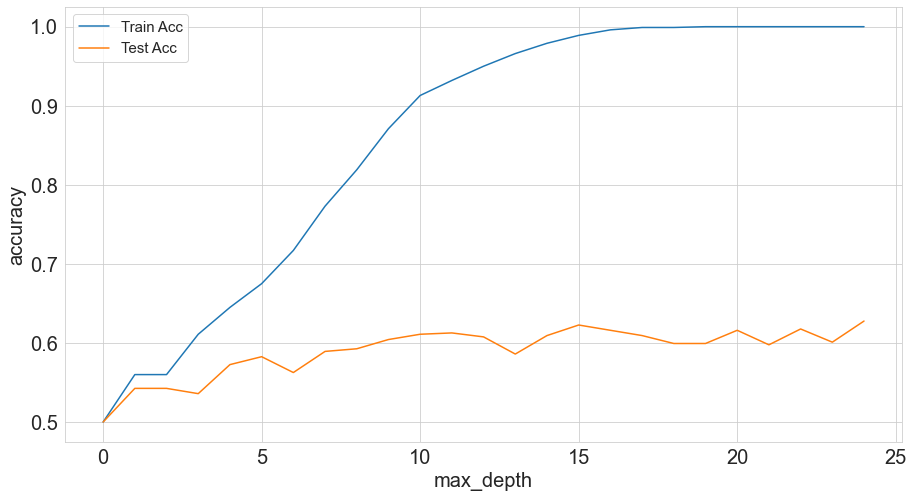

In [28]:
import matplotlib
%matplotlib inline

matplotlib.rc('xtick', labelsize=20)
matplotlib.rc('ytick', labelsize=20)

train_accuracies = [0.5]
test_accuracies = [0.5]

for depth in range(1,25):
    clf = tree.DecisionTreeClassifier(max_depth=depth)
    clf.fit(df_train[columns], df_train['quality'])
    
    train_pred = clf.predict(df_train[columns])
    test_pred = clf.predict(df_test[columns])
    
    train_accuracy = metrics.accuracy_score(df_train['quality'], train_pred)
    test_accuracy = metrics.accuracy_score(df_test['quality'], test_pred)
    
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)
    
plt.figure(figsize=(15,8))
sns.set_style('whitegrid')
plt.plot(train_accuracies, label="Train Acc")
plt.plot(test_accuracies, label="Test Acc")
plt.legend(loc="best", prop={'size':15})
plt.xticks(range(0, 26, 5))
plt.xlabel('max_depth', size=20)
plt.ylabel('accuracy', size=20)
plt.show()

# K-Fold

In [42]:
from sklearn import model_selection

if __name__ == '__main__':
    df = pd.read_csv('winequality-red.csv')
    df['kfold'] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    kf = model_selection.KFold(n_splits=5)
    
    # fill the new kfold column 
    for fold, (trn_, val_) in enumerate(kf.split(X=df)):
        df.loc[val_, 'kfold'] = fold
    
    # saving the new csv file
    df.to_csv('train_folds.csv', index=False)
    
    

# Stratified K-Fold

In [46]:
from sklearn import model_selection

if __name__ == "__main__":
    df = pd.read_csv('winequality-red.csv')
    df['kfold'] = -1
    
    df = df.sample(frac=1).reset_index(drop=True)
    
    # fetch the targets after shuffling
    y = df['quality'].values
    
    kf = model_selection.StratifiedKFold(n_splits=5)
    
    # fill the new kfold column
    for fold, (tr_, val_) in enumerate(kf.split(X=df, y=y)):
        df.loc[val_, 'kfold'] = fold
        
    # save the new csv file
    df.to_csv('Stratified_folds.csv', index=False)



Text(0, 0.5, 'count')

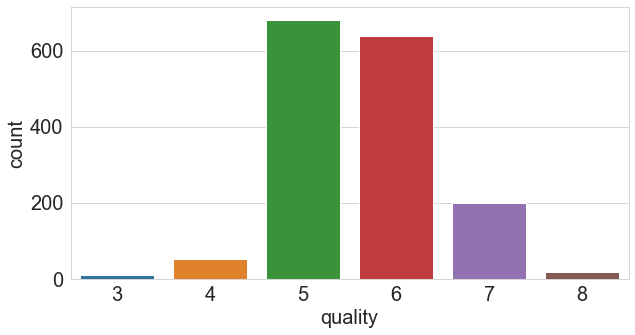

In [48]:
plt.figure(figsize=(10,5))
b = sns.countplot(x='quality', data=df)
b.set_xlabel('quality', fontsize=20)
b.set_ylabel('count', fontsize=20)